In [5]:
import pandas as pd
import os
import glob
import re
from datetime import datetime
import sys

def get_most_recent_file(directory, pattern):
    arquivos = glob.glob(os.path.join(directory, pattern))
    print(f"\nArquivos encontrados em {directory}:")
    if arquivos:
        for arquivo in arquivos:
            print(arquivo)
    else:
        print("Nenhum arquivo encontrado.")

    if not arquivos:
        print(f"Sem dados em {directory}.")
        sys.exit()
    arquivos_com_datas = []
    for arquivo in arquivos:
        nome_arquivo = os.path.basename(arquivo)
        print(f"\nAnalisando o arquivo: {nome_arquivo}")
        # Ajuste do regex conforme o formato real dos nomes dos arquivos
        match = re.search(r'_a_(\d{2}_\d{2}_\d{4})\.csv$', nome_arquivo)
        if match:
            data_str = match.group(1)
            print(f"Data extraída do nome do arquivo: {data_str}")
            try:
                data = datetime.strptime(data_str, '%d_%m_%Y')
                arquivos_com_datas.append((arquivo, data))
            except ValueError:
                print(f"Formato de data inválido em {nome_arquivo}.")
        else:
            print(f"Arquivo {nome_arquivo} não corresponde ao padrão esperado.")
    if not arquivos_com_datas:
        print(f"Sem arquivos com datas válidas em {directory}.")
        sys.exit()
    arquivo_mais_recente = max(arquivos_com_datas, key=lambda x: x[1])[0]
    print(f"\nArquivo mais recente selecionado em {directory}: {arquivo_mais_recente}")
    return arquivo_mais_recente

# Diretórios e padrões
diretorio_historico = 'csv/historico'
diretorio_previsao = 'csv/previsoes'
padrao_arquivos = '*_a_*.csv'  # Ajuste o padrão conforme necessário

# Obtém os arquivos mais recentes
historico_path = get_most_recent_file(diretorio_historico, padrao_arquivos)
previsoes_path = get_most_recent_file(diretorio_previsao, padrao_arquivos)

# Leitura dos dados históricos
historico = pd.read_csv(historico_path)

# Leitura dos dados previstos
previsoes = pd.read_csv(previsoes_path)

# Selecionando as colunas relevantes
historico = historico[['date', 'tmin', 'tmax']]
previsoes = previsoes[['data', 'temp_min_prevista', 'temp_max_prevista']]

# Exibindo as primeiras linhas para confirmar a leitura
print("\nDados históricos:")
print(historico.head())
print("\nDados previstos:")
print(previsoes.head())



Arquivos encontrados em csv/historico:
csv/historico\31_08_2024_a_30_09_2024.csv

Analisando o arquivo: 31_08_2024_a_30_09_2024.csv
Data extraída do nome do arquivo: 30_09_2024

Arquivo mais recente selecionado em csv/historico: csv/historico\31_08_2024_a_30_09_2024.csv

Arquivos encontrados em csv/previsoes:
csv/previsoes\01_10_2024_a_30_10_2024.csv

Analisando o arquivo: 01_10_2024_a_30_10_2024.csv
Data extraída do nome do arquivo: 30_10_2024

Arquivo mais recente selecionado em csv/previsoes: csv/previsoes\01_10_2024_a_30_10_2024.csv

Dados históricos:
         date  tmin  tmax
0  2024-08-31  16.4  27.2
1  2024-09-01  15.5  26.3
2  2024-09-02  15.4  26.3
3  2024-09-03  15.4  28.0
4  2024-09-04  17.0  31.0

Dados previstos:
         data  temp_min_prevista  temp_max_prevista
0  2024-10-01          15.071893          21.049934
1  2024-10-02          15.856820          21.083729
2  2024-10-03          15.117870          21.779657
3  2024-10-04          15.843969          24.424093
4  


Arquivos encontrados em csv/historico:
csv/historico\31_08_2024_a_30_09_2024.csv

Analisando o arquivo: 31_08_2024_a_30_09_2024.csv
Data extraída do nome do arquivo: 30_09_2024

Arquivo mais recente selecionado em csv/historico: csv/historico\31_08_2024_a_30_09_2024.csv

Arquivos encontrados em csv/previsoes:
csv/previsoes\01_10_2024_a_30_10_2024.csv

Analisando o arquivo: 01_10_2024_a_30_10_2024.csv
Data extraída do nome do arquivo: 30_10_2024

Arquivo mais recente selecionado em csv/previsoes: csv/previsoes\01_10_2024_a_30_10_2024.csv


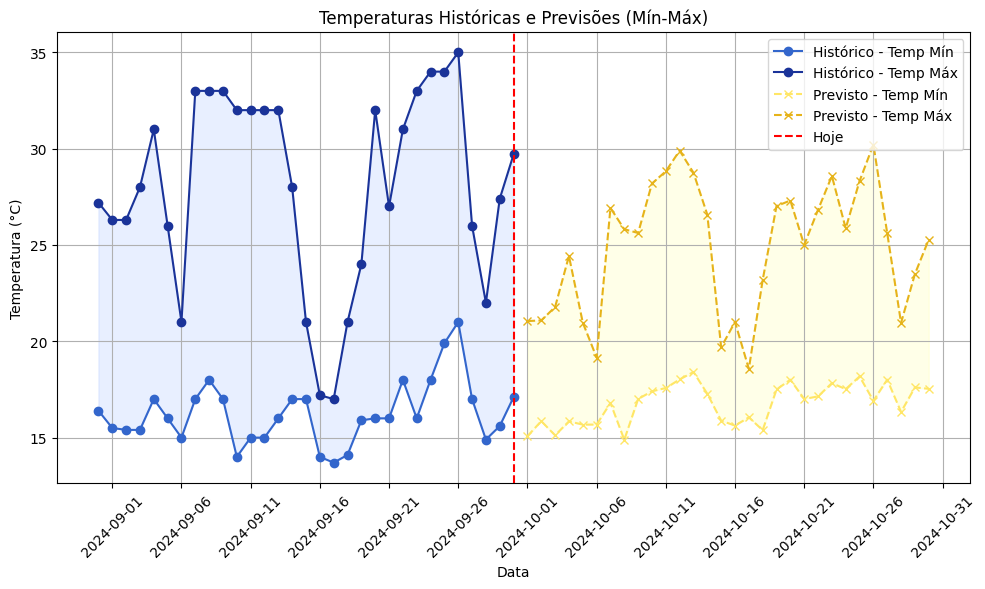

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import glob
import re
from datetime import datetime
import sys

def get_most_recent_file(directory, pattern):
    arquivos = glob.glob(os.path.join(directory, pattern))
    print(f"\nArquivos encontrados em {directory}:")
    if arquivos:
        for arquivo in arquivos:
            print(arquivo)
    else:
        print("Nenhum arquivo encontrado.")

    if not arquivos:
        print(f"Sem dados em {directory}.")
        sys.exit()
    arquivos_com_datas = []
    for arquivo in arquivos:
        nome_arquivo = os.path.basename(arquivo)
        print(f"\nAnalisando o arquivo: {nome_arquivo}")
        # Ajuste do regex conforme o formato real dos nomes dos arquivos
        match = re.search(r'_a_(\d{2}_\d{2}_\d{4})\.csv$', nome_arquivo)
        if match:
            data_str = match.group(1)
            print(f"Data extraída do nome do arquivo: {data_str}")
            try:
                data = datetime.strptime(data_str, '%d_%m_%Y')
                arquivos_com_datas.append((arquivo, data))
            except ValueError:
                print(f"Formato de data inválido em {nome_arquivo}.")
        else:
            print(f"Arquivo {nome_arquivo} não corresponde ao padrão esperado.")
    if not arquivos_com_datas:
        print(f"Sem arquivos com datas válidas em {directory}.")
        sys.exit()
    arquivo_mais_recente = max(arquivos_com_datas, key=lambda x: x[1])[0]
    print(f"\nArquivo mais recente selecionado em {directory}: {arquivo_mais_recente}")
    return arquivo_mais_recente

# Diretórios e padrões
diretorio_historico = 'csv/historico'
diretorio_previsao = 'csv/previsoes'
padrao_arquivos = '*_a_*.csv'  # Ajuste o padrão conforme necessário

# Obtém os arquivos mais recentes
historico_caminho = get_most_recent_file(diretorio_historico, padrao_arquivos)
previsoes_caminho = get_most_recent_file(diretorio_previsao, padrao_arquivos)

# Ler os arquivos CSV em DataFrames
historico = pd.read_csv(historico_caminho)
previsoes = pd.read_csv(previsoes_caminho)

# Definir as cores em RGB para as linhas
historico_min_rgb = (0.2, 0.4, 0.8)  # Azul para o histórico de temperatura mínima
historico_max_rgb = (0.1, 0.2, 0.6)  # Azul escuro para o histórico de temperatura máxima
previsao_min_rgb = (1.0, 0.9, 0.4)   # Amarelo para a previsão de temperatura mínima
previsao_max_rgb = (0.9, 0.7, 0.1)   # Amarelo escuro para a previsão de temperatura máxima

# Cores mais claras para o preenchimento
fill_historico_rgb = (0.7, 0.8, 1.0)  # Azul claro para o preenchimento histórico
fill_previsao_rgb = (1.0, 1.0, 0.7)   # Amarelo claro para o preenchimento previsto

# Converter as colunas de datas para datetime
historico['date'] = pd.to_datetime(historico['date'])
previsoes['data'] = pd.to_datetime(previsoes['data'])

# Unir os dados históricos e previstos em um único dataframe
dados = pd.DataFrame({
    'date': pd.concat([historico['date'], previsoes['data']]),
    'tmin': pd.concat([historico['tmin'], previsoes['temp_min_prevista']]),
    'tmax': pd.concat([historico['tmax'], previsoes['temp_max_prevista']])
})

# Data de transição (última data do histórico)
data_transicao = historico['date'].iloc[-1]

# Plotando os dados
plt.figure(figsize=(10, 6))

# Preenchendo a área entre as temperaturas mínimas e máximas para os dados históricos
plt.fill_between(dados['date'][:len(historico)], dados['tmin'][:len(historico)], dados['tmax'][:len(historico)],
                 color=fill_historico_rgb, alpha=0.3)

# Preenchendo a área entre as temperaturas mínimas e máximas para os dados previstos
plt.fill_between(dados['date'][len(historico):], dados['tmin'][len(historico):], dados['tmax'][len(historico):],
                 color=fill_previsao_rgb, alpha=0.3)

# Plotando as linhas das temperaturas mínimas e máximas
plt.plot(dados['date'][:len(historico)], dados['tmin'][:len(historico)], label='Histórico - Temp Mín', color=historico_min_rgb, marker='o')
plt.plot(dados['date'][:len(historico)], dados['tmax'][:len(historico)], label='Histórico - Temp Máx', color=historico_max_rgb, marker='o')
plt.plot(dados['date'][len(historico):], dados['tmin'][len(historico):], label='Previsto - Temp Mín', color=previsao_min_rgb, linestyle='--', marker='x')
plt.plot(dados['date'][len(historico):], dados['tmax'][len(historico):], label='Previsto - Temp Máx', color=previsao_max_rgb, linestyle='--', marker='x')

# Adicionando a linha vermelha tracejada na data de transição
plt.axvline(x=data_transicao, color='red', linestyle='--', label='Hoje')

# Ajustando o eixo X para exibir uma data a cada 5 dias
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Ajustando o gráfico
plt.title('Temperaturas Históricas e Previsões (Mín-Máx)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend(handles=[plt.Line2D([0], [0], color=historico_min_rgb, marker='o', label='Histórico - Temp Mín'),
                    plt.Line2D([0], [0], color=historico_max_rgb, marker='o', label='Histórico - Temp Máx'),
                    plt.Line2D([0], [0], color=previsao_min_rgb, linestyle='--', marker='x', label='Previsto - Temp Mín'),
                    plt.Line2D([0], [0], color=previsao_max_rgb, linestyle='--', marker='x', label='Previsto - Temp Máx'),
                    plt.Line2D([0], [0], color='red', linestyle='--', label='Hoje')])

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

